# Data Preprocess

In [34]:
import yfinance as yf
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
closing_prices = data['Close'].dropna()
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620827  72.681274  71.373203  71.627077  135480400
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307487  73.609722  71.849510  71.849510  132079200


## Central Tendency

mean_price: 151.9783
median_price: 150.5636
mode_price: 88.4850


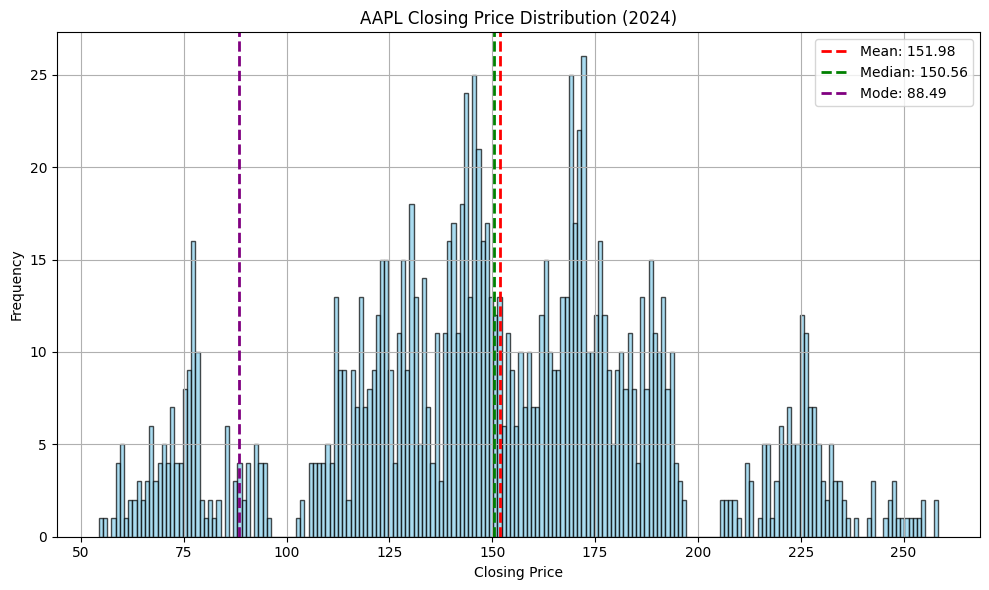

In [ ]:
mean_price = closing_prices.mean().iloc[0]
median_price = closing_prices.median().iloc[0]
mode_result = stats.mode(closing_prices, keepdims=True)
mode_price = mode_result.mode.item()

print(f"mean_price: {mean_price:.4f}")
print(f"median_price: {median_price:.4f}")
print(f"mode_price: {mode_price:.4f}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(closing_prices, bins=200, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_price:.2f}')
plt.title(f'{ticker} - Central Tendency')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Dispersion

range_price: 204.0181
var_price: 1765.5153
std_price: 42.0180
iqr_price: 49.8198


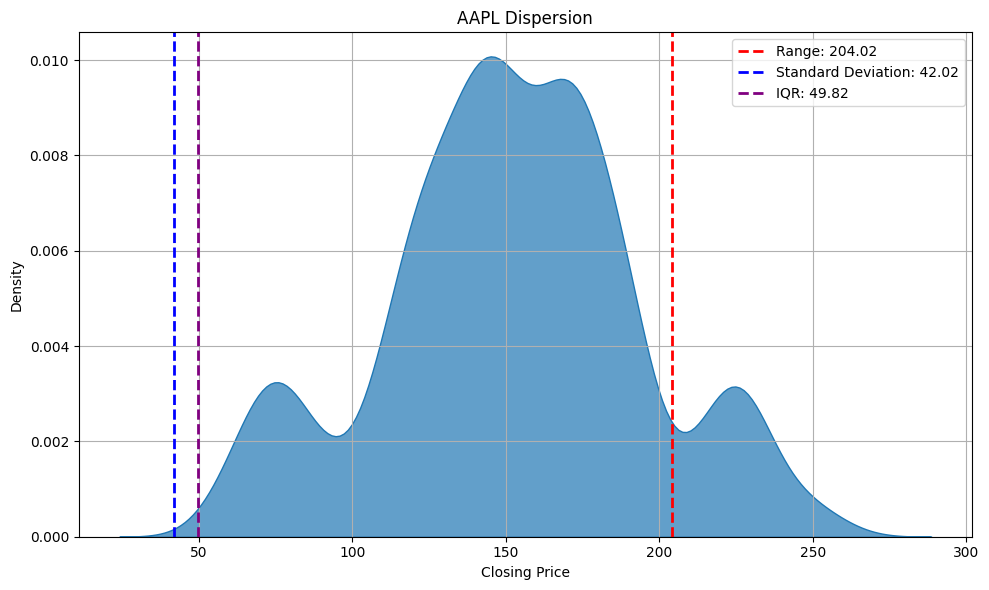

In [52]:
range_price = closing_prices.max().iloc[0] - closing_prices.min().iloc[0]
var_price = closing_prices.var().iloc[0]
std_price = closing_prices.std().iloc[0]
iqr_price = (closing_prices.quantile(0.75) - closing_prices.quantile(0.25)).iloc[0]

print(f"range_price: {range_price:.4f}")
print(f"var_price: {var_price:.4f}")
print(f"std_price: {std_price:.4f}")
print(f"iqr_price: {iqr_price:.4f}")

plt.figure(figsize=(10, 6))
sns.kdeplot(closing_prices, fill=True, color='skyblue', alpha=0.7)
plt.axvline(range_price, color='red', linestyle='dashed', linewidth=2, label=f'Range: {range_price:.2f}')
# plt.axvline(var_price, color='green', linestyle='dashed', linewidth=2, label=f'Variance: {var_price:.2f}')
plt.axvline(std_price, color='blue', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_price:.2f}')
plt.axvline(iqr_price, color='purple', linestyle='dashed', linewidth=2, label=f'IQR: {iqr_price:.2f}')
plt.title(f'{ticker} Dispersion')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Skewness and Kurtosis

In [57]:
skewness = closing_prices.skew().iloc[0]
kurtosis = closing_prices.kurtosis().iloc[0]

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")



Skewness: -0.0340
Kurtosis: -0.1563


# Covariance and Correlation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker          NVDA
Date                
2020-01-02  5.972162
2020-01-03  5.876571
2020-01-06  5.901215
2020-01-07  5.972660
2020-01-08  5.983862
Ticker           INTC
Date                 
2020-01-02  53.666470
2020-01-03  53.013725
2020-01-06  52.863766
2020-01-07  51.981674
2020-01-08  52.016960
cov_matrix:
              NVIDIA       INTEL
NVIDIA  1461.560750 -233.877409
INTEL   -233.877409  114.291145
corr_matrix:
           NVIDIA     INTEL
NVIDIA  1.000000 -0.572234
INTEL  -0.572234  1.000000


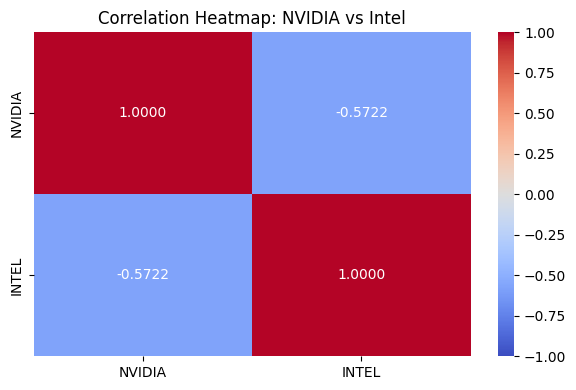

In [65]:
NVIDIA = yf.download('NVDA', start="2020-01-01", end="2025-01-01")
INTEL = yf.download('INTC', start="2020-01-01", end="2025-01-01")
n_close = NVIDIA['Close'].dropna()
i_close = INTEL['Close'].dropna()
print(n_close.head())
print(i_close.head())

combined = pd.concat([n_close, i_close], axis=1, join = 'inner')
combined.columns = ['NVIDIA', 'INTEL']

cov_matrix = combined.cov()
corr_matrix = combined.corr()

print(f'cov_matrix:\n {cov_matrix}')
print(f'corr_matrix:\n {corr_matrix}')

# Plot Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: NVIDIA vs Intel")
plt.tight_layout()
plt.show()
